In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("21810033_Abhishek More_323036_Comp-C2\Covid testing details.csv")
df.head(3)

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region,country_flag
0,Hubei,China,35.86166,104.195397,729,39.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
1,Guangdong,China,35.86166,104.195397,53,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
2,Zhejiang,China,35.86166,104.195397,43,0.0,NaN,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png


In [6]:
df['country_flag'].astype('str')
df['latitude'].astype('str')
df['longitude'].astype('str')
df['update_time'].astype('str')

0        2020-01-24 14:55:00
1        2020-01-24 14:55:00
2        2020-01-24 14:55:00
3        2020-01-24 14:55:00
4        2020-01-24 14:55:00
                ...         
24786        3/11/2020 23:13
24787        3/11/2020 23:13
24788        3/11/2020 23:33
24789        3/11/2020 23:53
24790        3/11/2020 23:53
Name: update_time, Length: 24791, dtype: object

In [7]:
df.drop(["country_flag","latitude","longitude","update_time"], inplace = True, axis = 1)

In [8]:
df.head(3)

,province,country,confirmed_cases,deaths,recovered,data_source,country_code,region
0,Hubei,China,729,39.0,NaN,bno,CHN,Asia
1,Guangdong,China,53,0.0,NaN,bno,CHN,Asia
2,Zhejiang,China,43,0.0,NaN,bno,CHN,Asia


<AxesSubplot:>

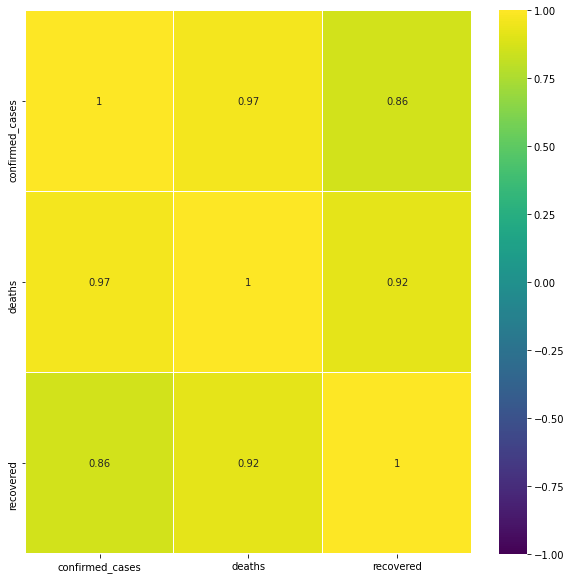

In [9]:
df_kor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [10]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

province           0
country            0
confirmed_cases    0
deaths             0
recovered          0
data_source        0
country_code       0
region             0
dtype: int64

In [11]:
y=df["confirmed_cases"]

x=df[["deaths", "recovered"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 465)

In [12]:
print('Training Data Count:', x_train.shape)
print('Testing Data Count::', x_test.shape) 
print(y_test.shape)
print(y_train.shape)

Training Data Count: (2468, 2)
Testing Data Count:: (617, 2)
(617,)
(2468,)


In [13]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [14]:
yG_pred = model.predict(x_test)
yG_pred

array([ 151,    2,  296,    0,    0,   91,  935,    0,    2,    0,    0,
         18,  342,    0,    0,  935,  259,  481,  126,    2,  354,  146,
          0,  245,    2,   25,  245,    4,    2,  480,   25,    0,    0,
          4,    0,  661,    0,  121,    0,   10,  661,  168,    4, 1018,
          4,    4,    0,   31,    0,    0,    0,  538,    0,    2,    0,
          0,  631,  245,    0,    0,   76,    0,  212,  114,   25,   93,
        311,    0,    0,  285,  114,    0,   83,  306,    0, 1016,    2,
          4,   93,   91,  168,  366,    0,    0,  151,  631,    0,  480,
          0,    0,    0,    0,    4,  146,    0,   75,  151,    0, 1018,
          2,  245,   10,    2,    4,  195,  245,    0,  286,  481,   93,
        661,  151,  990,  174,  151,    2,   10,    0,    4,    0,  146,
          0,  151,    0,    0,    0,    0,    2,  366,  480,    4,    0,
          4,    0,   93,    0,  661,  631,    0,  296,  121,    4,    0,
        151,    0,    0,    0,   76,    2,    0,   

In [15]:
accuracy = accuracy_score(y_test,yG_pred)*100
print("Naive Bayes model accuracy:", accuracy) 

Naive Bayes model accuracy: 15.559157212317668


In [17]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train, y_train) 

yK_pred = knn.predict(x_test) 
yK_pred

array([    6,     1,   539,     2,     2,    76,   935,     2,     1,
           2,     2,    96,   342,     2,     2,  1018,    10,   480,
         162,     1,    10,   121,     2,   245,     1,    18,   252,
           3,     1, 67466,    18,     2,     2,     3,     2,   127,
           2,   121,     2,    10,    70,   168,    10,   935,     3,
           3,     2,    14,     2,     2,     2,   538,     2,     1,
           2,     2,   576,   133,     2,     2,    76,     2,    41,
          22,    18,   135,   252,     2,     2,    75,    22,     2,
          31,   306,     2,   935,     1,    10,   125,    91,   168,
       33366,     2,     2,     6,   576,     2,   309,     2,     2,
           2,     2,     3,   146,     2,    75,     6,     2,   990,
           1,   245,    10,     1,     3,    18,   174,     2,    10,
         481,    75,   124,     6,   990,   136,     6,     1,    10,
           2,     3,     2,    91,     2,     6,     2,     2,     2,
           2,     1,

In [18]:
print("kNN model accuracy:", accuracy_score(y_test, yK_pred)*100) 

kNN model accuracy: 20.583468395461914


In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
yD_pred = dt.predict(x_test) 
yD_pred

array([    4,     1,   934,     1,     1,   146,   935,     1,     1,
           1,     1,    96,   342,     1,     1,   935,    11,   480,
          75,     1,    10,   124,     1,   245,     1,     2,   245,
           2,     1, 67707,     2,     1,     1,     2,     1,   127,
           1,   143,     1,    10,    70,   168,    18,  1018,     2,
           2,     1,    31,     1,     1,     1,   988,     1,     1,
           1,     1,   631,   326,     1,     1,    76,     1,    45,
          22,     2,   122,   311,     1,     1,    75,    22,     1,
          31,   306,     1,  1016,     1,    18,   125,   851,   168,
       33366,     1,     1,     4,   631,     1,   480,     1,     1,
           1,     1,     2,   146,     1,    75,     4,     1,  1018,
           1,   245,    10,     1,     2,   133,   293,     1,    10,
         481,    75,   124,     4,   990,   146,     4,     1,    10,
           1,     2,     1,    91,     1,     4,     1,     1,     1,
           1,     1,

In [21]:
print("Decision Tree model accuracy:", accuracy_score(y_test, yD_pred)*100) 

Decision Tree model accuracy: 36.466774716369535


In [22]:
from sklearn.svm import LinearSVC 
svc = LinearSVC()
svc.fit(x_train, y_train)

c:\python\python385\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()